In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## Carregamento e Pré-processamento das imagens.

In [13]:
base_dir = "../data"

In [15]:
class_map = {
    "Bengin cases": 0,
    "Malignant cases": 1,
    "Normal cases": 2
}

In [4]:
IMG_SIZE = 224   ## tamanho que todas as imagens terão 224x224x3(padrão)
data = []
labels = []

In [16]:
for class_name, label in class_map.items():
    class_path = os.path.join(base_dir, class_name)
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)
        try:
            img = Image.open(file_path).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE)) ## 224x224
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Erro ao carregar {file_path}: {e}")

In [17]:
## Transformar em arrays + normalizar + dividir

In [18]:
X = np.array(data, dtype="float32") / 255.0  ## Normalização
y = to_categorical(np.array(labels), num_classes=3)

In [19]:
# Divisão treino, validação e teste

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [20]:
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treino: (767, 224, 224, 3), Validação: (165, 224, 224, 3), Teste: (165, 224, 224, 3)


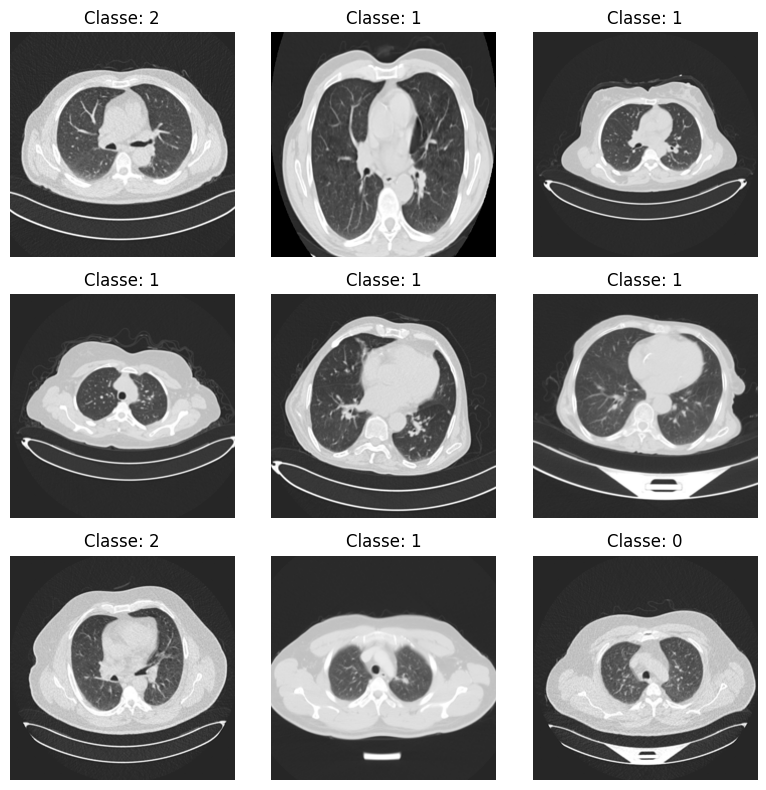

In [ ]:
## Visualização de amostras

import matplotlib.pyplot as plt

def mostrar_amostras(X, y, n=9):
    plt.figure(figsize=(8,8))
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(X[i])
        plt.title(f"Classe: {np.argmax(y[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

mostrar_amostras(X_train, y_train)

Criação da CNN 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [24]:
model = Sequential([
    
    ## 1º Camada de convolução com 32 filtros (kernels) de tamanho 3x3
    ## Função de ativação ReLu
    ## Define a forma da entrada: 224x224 pixels com 3 canais (RGB)
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),

    ## 1º Camada de max pooling:
    ## Reduz as dimensões extraindo os valores máximos em janelas de 2x2
    MaxPooling2D(pool_size=(2, 2)),

    # 2º Camada convolucional:
    # - 64 filtros de 3x3
    # - Ativação ReLU
    Conv2D(64, (3, 3), activation='relu'),

    # 2º Camada de max pooling:
    MaxPooling2D(pool_size=(2, 2)),

    # 3º Camada convolucional:
    # Camada convolucional 3:
    # - 128 filtros de 3x3
    # - Ativação ReLU
    Conv2D(128, (3, 3), activation='relu'),
    
    # 3º camada de max pooling:
    MaxPooling2D(pool_size=(2, 2)),


    # Flatten:
    # - Transforma o output 3D das convoluções em um vetor 1D para a camada densa
    Flatten(),


    # Camada totalmente conectada (densa):
    # - 128 neurônios
    # - Ativação ReLU

    Dense(128, activation='relu'),

    # Dropout:
    # - Desativa aleatoriamente 50% dos neurônios durante o treinamento
    # - Ajuda a evitar overfitting
    Dropout(0.5),


    # Camada de saída:
    # - 3 neurônios (um para cada classe)
    # - Ativação softmax para classificação multiclasse
    Dense(3, activation='softmax')

])

c:\Users\danie\Documents\PORTFOLIO\RNA\CNN\projeto-cancer-pulmao\env_pulmao\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Exibe o resumo da arquitetura da rede
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
## Compilar o modelo

In [27]:
#Compila o modelo definindo o otimizador, a função de perda e as métricas de avaliação
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# - 'adam' é um otimizador eficiente que combina o momentum com a adaptação da taxa de aprendizado

# Função de perda:
    # - 'categorical_crossentropy' é usada para classificação multiclasse com labels one-hot encoded
    # - Ideal quando temos mais de 2 classes e usamos to_categorical no y

#'accuracy' para monitorar o desempenho do modelo em cada época

In [28]:
## Treinamento do modelo

In [29]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 568ms/step - accuracy: 0.4829 - loss: 1.3349 - val_accuracy: 0.6364 - val_loss: 0.8102
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 510ms/step - accuracy: 0.6756 - loss: 0.7399 - val_accuracy: 0.8121 - val_loss: 0.4790
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 544ms/step - accuracy: 0.7983 - loss: 0.4830 - val_accuracy: 0.8788 - val_loss: 0.3116
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 568ms/step - accuracy: 0.9190 - loss: 0.2758 - val_accuracy: 0.9212 - val_loss: 0.1855
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step - accuracy: 0.9486 - loss: 0.1689 - val_accuracy: 0.9333 - val_loss: 0.2072
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 851ms/step - accuracy: 0.9487 - loss: 0.1559 - val_accuracy: 0.9576 - val_loss: 0.1125
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 857ms/step - accuracy: 0.9775 - loss: 0.0711 - val_accuracy: 0.9697 - val_loss: 0.0758
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 858ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accu

In [ ]:
## Avaliação do modelo nos dados de teste

# (verificar se não houve sobreajuste, ou seja, se o modelo não "memorizou" os dados 
# de treino, ao invés de aprender os padrões.  )

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no teste: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9963 - loss: 0.0090
Acurácia no teste: 0.9939


In [32]:
## Visualizar o treinamento

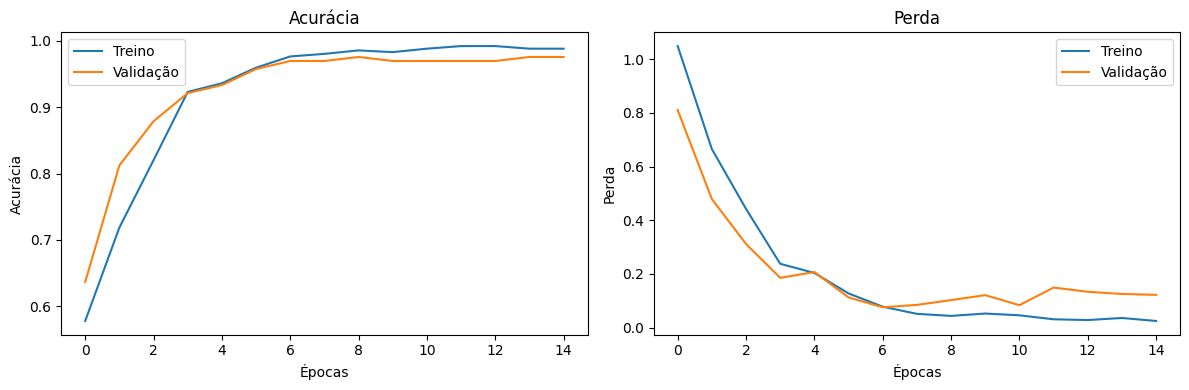

In [38]:

plt.figure(figsize=(12, 4))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
## Matriz de confusão e relatório de classificação
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Previsões (em forma one-hot encoded)
y_pred_proba = model.predict(X_test)

# Converter para classe (índice da maior probabilidade)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [44]:
# Mapear as classes para nomes legíveis
class_names = ['Benigno', 'Maligno', 'Normal']

print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Benigno       1.00      0.94      0.97        18
     Maligno       1.00      1.00      1.00        84
      Normal       0.98      1.00      0.99        63

    accuracy                           0.99       165
   macro avg       0.99      0.98      0.99       165
weighted avg       0.99      0.99      0.99       165



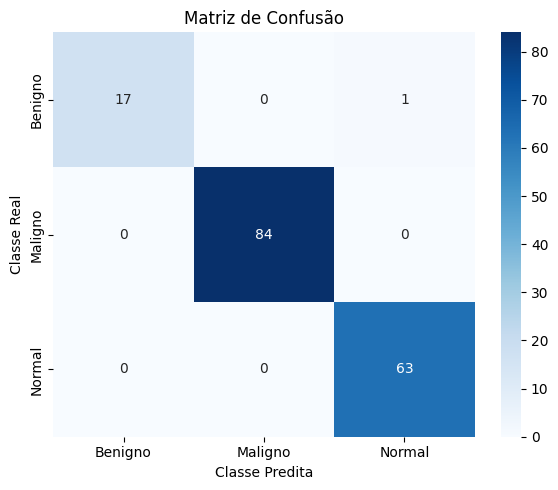

In [45]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

In [46]:
"""

    Testando o classificador com imagens individuais

"""

'\n\n    Testando o classificador com imagens individuais\n\n'

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [48]:
# Dicionário para mapear os rótulos
class_names = {
    0: 'Benigno',
    1: 'Maligno',
    2: 'Normal'
}

In [49]:
def carregar_imagem(caminho, img_size=224):
    """
    Carrega, redimensiona e prepara a imagem para predição
    """
    img = image.load_img(caminho, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normaliza os pixels
    img_array = np.expand_dims(img_array, axis=0)  # adiciona dimensão para batch (1, 224, 224, 3)
    return img_array

In [55]:
def classificar_imagem(modelo, caminho_imagem):
    """
    Faz a predição e retorna a classe com maior probabilidade
    """
    imagem_processada = carregar_imagem(caminho_imagem)
    pred = modelo.predict(imagem_processada)
    classe_predita = np.argmax(pred)
    probabilidade = np.max(pred)
    
    print(f"Classe predita: {class_names[classe_predita]} ({probabilidade:.2f} de confiança)")
    return classe_predita, probabilidade

In [60]:
# Substitua pelo caminho da imagem que deseja testar
caminho_da_imagem = "../data/Malignant cases/Malignant case (1).jpg"

In [61]:
# Classificação
classificar_imagem(model, caminho_da_imagem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Classe predita: Maligno (1.00 de confiança)


(np.int64(1), np.float32(0.99992335))

In [63]:
## Visualizar a imagem junto com o resultado

def mostrar_com_resultado(caminho_imagem):
    img = Image.open(caminho_imagem)
    plt.imshow(img)
    plt.axis('off')
    
    classe_predita, prob = classificar_imagem(model, caminho_imagem)
    plt.title(f"{class_names[classe_predita]} ({prob:.2f})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Classe predita: Normal (1.00 de confiança)


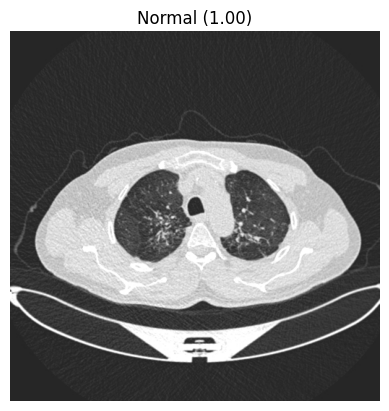

In [65]:
# Exemplo
mostrar_com_resultado("../data/Normal cases/Normal case (15).jpg")